**Exercise on Regression Using Economic Data of Spain**

In this exercise, we will see the influence of the regression on the predicted output. For this, we will work on real data that represent 33 type of economic information related to 52 Spanish cities and recorded over the period of 15 years (2003-2017).

> **The Regression You can Make:**

 You can perform regression by setting the variables city, serie and year in the file main.py using one of the values indicated below for each of these variables.

> **The Frameworks You Can Pick**

You can choose linear regression using SciekitLearn.

> **The Years You Can Pick**

You can choose any year from 2003 to 2017.

> **The Cities You Can Pick:**

A Coruña, Albacete, Alicante, Almería, Álava, Asturias, Ávila, Badajoz, Barcelona, Vizcaya, Burgos, Cáceres, Cádiz, Cantabria, Castellón, Ceuta, Ciudad Real, Córdoba, Cuenca, Guipúzcoa, Girona, Granada, Guadalajara, Huelva, Huesca, Baleares, Jaén, La Rioja, Las Palmas, León, Lleida, Lugo, Madrid, Málaga, Melilla, Murcia, Navarra, Ourense, Palencia, Pontevedra, Salamanca, Santa Cruz de Tenerife, Segovia, Sevilla, Soria, Tarragona, Teruel, Toledo, Valencia, Valladolid, Zamora, Zaragoza,

> **The Metrics You Can Choose:**

Men Activity Percentage, Women Activity Percentage, Men Unemployment Percentage, Women Unemployment Percentage, Men Employment Percentage, Women Employment Percentage, Women Unemployment Percentage, Men employment Percentage, Women employment Percentage, Índice general. Variación mensual., Alimentos y bebidas no alcohólicas. Índice., Bebidas alcohólicas y tabaco. Índice., Vestido y calzado. Índice., Sanidad. Índice., Transporte. Índice., Comunicaciones. Índice., Ocio y cultura. Índice., Enseñanza. Índice., Restaurantes y hoteles. Índice., Otros bienes y servicios. Índice., Sin asalariados. Total de empresas. Total CNAE. Empresas., De 1 a 2. Total de empresas. Total CNAE. Empresas., De 3 a 5. Total de empresas. Total CNAE. Empresas., De 6 a 9. Total de empresas. Total CNAE. Empresas., De 10 a 19. Total de empresas. Total CNAE. Empresas., De 20 a 49. Total de empresas. Total CNAE. Empresas., De 50 a 99. Total de empresas. Total CNAE. Empresas., De 100 a 199. Total de empresas. Total CNAE. Empresas., De 200 a 499. Total de empresas. Total CNAE. Empresas., De 500 a 999. Total de empresas. Total CNAE. Empresas., De 1000 a 4999. Total de empresas. Total CNAE. Empresas., De 5000 o más asalariados. Total de empresas. Total CNAE. Empresas., Total. Total de empresas. Total CNAE. Empresas.,


> **Make sure to upload:**
  - data.csv


> Download Link: https://drive.google.com/drive/folders/1pg5waaFaiC5nelXFs2oqn16mklPMB56w?usp=drive_link


> **Note:**

These data have been used in [1] and further implementation is available on [2].

> REFERENCES

[1] Zakaria Abdelmoiz Dahi, Gabriel Luque, Enrique Alba: A Machine Learning-Based Approach for Economics-Tailored Applications: The Spanish Case Study. EvoApplications 2022: 567-583

[2] https://github.com/Zakaria-Dahi/Linear_Regression_Economic_Data


> IMPORTANT:

These data and notebook are under copyright. So, make sure to reference their authors and source when using them [1].



**Task Description:**
  - Try the regressor with several algorithm configurations for the same metric.
  - Try several data series for the same metric.
  - Try several metrics for the same series and see how the regressor learns.

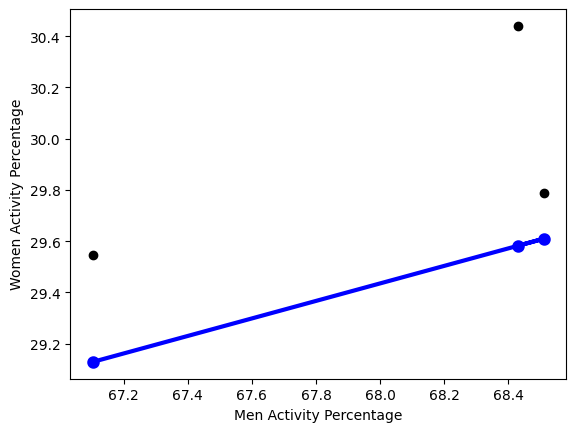

----------------------------------------
The Evaluation Metrics of the Linear Regression
----------------------------------------
The Mean Absolute Error Value is: 0.4845372769735808
The Mean Squared Error is: 0.3141986279456394
The Root Mean Squared Error is:0.5605342344100308


In [10]:
# Scikit learn packages
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
# Standard packages
import subprocess
import warnings
import os.path
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
# Other machine learning packages
import seaborn as sns

class LR_SL:
    """
    implement linear regression using Scikitlean
    """
    def __init__(self):
        self.k = 1
        self.y_test = []
        self.y_pred = []

    def linear_regression(self, *args):
        threshold = args[0];
        city = args[1];
        serie_1 = args[2];
        serie_2 = args[6]
        year = args[3];
        lr=args[4];
        train_epochs=args[5];
        df = pd.read_csv('data.csv')  # import the CSV
        df2 = df.loc[(df['location_name'] == city) & (df['serie_name'] == serie_1) & (df['year'] == year)] # just change the name of the city, serie and year you want to predict
        df3 = df.loc[(df['location_name'] == city) & (df['serie_name'] == serie_2) & (df['year'] == year)] # just change the name of the city, serie and year you want to predict
        if (len(df2['value']) > threshold) & (len(df3['value']) > threshold) :
            # example by wrking on a smaller dataset. For each instruction is the same explanation as above
            df2 = df[:][:threshold]  # selec only 500 datasets
            df3 = df[:][:threshold]  # selec only 500 datasets
        # Training the model
        x = np.array(df2['value']).reshape(-1, 1)  # reshape the vector into an np array: this the feature
        y = np.array(df3['value']).reshape(-1, 1)  # reshape the vector into an array: this is the target
        #df2.dropna(inplace=True)  # removes all the rows with Null in it
        X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25)  # its a method of sciekitlearn to split the dataset into training and testing, where 0.25 corresponds to the percentage of the datasamples to be considered as testing set
        # it splits the x and y each one appart. It will produce two training sets and two testing sets for "period" and for "value".
        regr = make_pipeline(StandardScaler(),SGDRegressor(loss='squared_error',learning_rate='invscaling',max_iter=train_epochs))  # create the object containing the stochastic linear regression of scikitlearn
        regr.fit(X_train, y_train)  # this trains the linear model, meaning making the linear model fit the data
        #print(regr.score(X_test,y_test))  # I think the higher the value, the better. NB: this return the coefficient of determination R^2 defined as (1-U/V) => full defintion of U and V available here https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
        y_pred = regr.predict(X_test)  # this predicts the y prediction using the linear regression model, its the line!
        plt.scatter(X_test, y_test, color='k')  # plot the original features and the target
        plt.scatter(X_test, y_pred, color='b', linewidth=3)  # plot the training features and the predicted target
        plt.plot(X_test, y_pred, color='b', linewidth=3)  # plot the training features and the predicted target
        self.y_pred = y_pred
        self.y_test = y_test
        plt.xlabel(serie_1)
        plt.ylabel(serie_2)
        plt.show()  # it does not fit well so the data is not suitable for linear regression. IF so happens, one can try to reduce the data we are working on

        # Allows seeing how the regressor graphs change considering the order of the polynomial
        #sns.lmplot(x="period", y="value", data=df2, order=1, ci=None)  # plots the scatter plot
        #df2.fillna(method='ffill', inplace=True)  # eliminates the Nans

    def display_result(self,*args):
        y_test = args[0];
        y_pred = args[1];
        city = args[2];
        serie = args[3];
        year = args[4];
        # the evaluation metrics for regression models: MAE and MSE: Mean Absolute Error and Mean Square Error, and Root Mean Square error
        mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
        mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
        rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
        print("----------------------------------------")
        print("The Evaluation Metrics of the Linear Regression")
        print("----------------------------------------")
        print(f"The Mean Absolute Error Value is: {mae}")
        print(f"The Mean Squared Error is: {mse}")
        print(f"The Root Mean Squared Error is:{rmse}")


def main():
    """
    Help:
    Common paramters:
        city: choose one of the 52 cities available (e.g. Ceuta)
        serie: choose one of the 33 seconomical metrics (e.g. companies with X employees, etc).
        year: choose a year from 2003 to 2007
        lr: the learning rate of the gradient descent, choos: "constant", "optimal", "invscaling", "adaptive"
        train_epochs: training epochs (A.K.A number of iterations the gradient descent does)
    """
    # -_-_-_-_-_-_- Parameters _-_-_-_-_-_-_-_-_-_-_

    frame = 1;
    city  = "Ceuta"
    serie_1 = "Men Activity Percentage"
    serie_2 = "Women Activity Percentage"
    year = 2003
    lr = 0.01 # the learning rate of the gradient descent
    train_epochs = 2000 # training epochs

    # _-_-_-_-_-_ The call to the univariate linear regression _-_-_-_-__-_-
    var = LR_SL()
    var.linear_regression(500,city,serie_1,year,lr,train_epochs,serie_2)
    var.display_result(var.y_test, var.y_pred, city, serie_1, year)

if __name__ == "__main__":
    main()